#

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.cluster import AffinityPropagation

In [35]:
df = pd.read_csv("abs for clusts.csv", header=None)

In [36]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,NaN,abs -- СРЛЯ,av % -- СРЛЯ,abs -- Роговатка,av % -- Роговатка,abs -- Вадюга,av % -- Вадюга,abs -- Хиславичи,av % -- Хиславичи,abs -- Лужниково,...,abs -- Краснолипье,av % -- Краснолипье,abs -- Владимирское,av % -- Владимирское,abs % -- Заонежье,av % -- Заонежье,abs % -- Спиридонова Буда,av % -- Спиридонова Буда,abs % -- Берно,av % -- Берно
1,t0 (начало),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0
2,t1 (начало подъема),"11,06",6%,"29,21428571",16%,"29,04",16%,"78,16666667",37%,"21,85185185",...,"73,75",36%,"28,16",16%,"11,00",11%,"25,50",28%,"24,50",14%
3,t2 (конец подъема),"156,22",89%,"78,32142857",44%,"118,48",63%,"161,0952381",76%,122,...,"144,50",71%,"97,42",55%,"30,00",30%,"60,59",67%,"137,13",76%
4,t3 (начало падения),"167,63",95%,"135,75",76%,"148,8",80%,"198,1428571",93%,"149,4444444",...,"201,00",99%,"165,91",93%,"63,00",63%,"83,76",93%,"170,29",95%


In [37]:
govors = ["СРЛЯ", "Роговатка", "Вадюга", "Хиславичи", "Лужниково",
          "ШМП", "Городок", "Михайлов", "Малинино", "Ильмень", "Веегора", "Мосеево", "Сцепное", "Лух_и_Теза",
          "Соболево", "Нехочи", "Дон", "Горяны", "Опочка", "Ламки", "Краснолипье", "Владимирское", "Заонежье",
          "Спиридонова Буда", "Берно"]

av_cols = [i for i in range(2, df.shape[1], 2)]

In [38]:
df_av = df.iloc[:, [0] + av_cols].copy()
df_av.columns = ['param'] + govors
df_av.set_index('param', inplace=True)

In [39]:
valid_params = [
    't1 (начало подъема)', 't2 (конец подъема)', 't3 (начало падения)', 't2-t3',
    't4 (начало хвоста)', 't5 (конец хвоста)',
    'f0 (начало)', 'f1 (начало подъема)', 'f2 (конец подъема)',
    'f3 (начало падения)', 'f4 (начало хвоста)', 'f5 (конец хвоста)'
]

In [40]:
df_av = df_av.loc[df_av.index.str.strip().isin(valid_params)]

rename_map = {
    't1 (начало подъема)': 't1',
    't2 (конец подъема)': 't2',
    't3 (начало падения)': 't3',
    't4 (начало хвоста)': 't4',
    't5 (конец хвоста)': 't5',
    'f0 (начало)': 'f0',
    'f1 (начало подъема)': 'f1',
    'f2 (конец подъема)': 'f2',
    'f3 (начало падения)': 'f3',
    'f4 (начало хвоста)': 'f4',
    'f5 (конец хвоста)': 'f5',
}
df_av.rename(index=rename_map, inplace=True)

In [41]:
df_av.head(10)

,СРЛЯ,Роговатка,Вадюга,Хиславичи,Лужниково,ШМП,Городок,Михайлов,Малинино,Ильмень,...,Нехочи,Дон,Горяны,Опочка,Ламки,Краснолипье,Владимирское,Заонежье,Спиридонова Буда,Берно
param,,,,,,,,,,,,,,,,,,,,,
t1,6%,16%,16%,37%,14%,33%,46%,36%,28%,15%,...,34%,31%,16%,30%,43%,36%,16%,11%,28%,14%
t2,89%,44%,63%,76%,76%,74%,91%,68%,79%,58%,...,70%,72%,66%,63%,78%,71%,55%,30%,67%,76%
t3,95%,76%,80%,93%,93%,88%,98%,98%,90%,94%,...,97%,90%,100%,89%,95%,99%,93%,63%,93%,95%
t4,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,...,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
t5,113%,119%,124%,111%,117%,111%,112%,113%,122%,119%,...,114%,112%,122%,113%,116%,125%,115%,120%,116%,115%
t2-t3,6%,32%,16%,17%,17%,15%,8%,30%,11%,37%,...,27%,18%,34%,26%,17%,28%,38%,33%,26%,18%
f0,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,...,100%,100%,100%,100%,111%,111%,103%,113%,100%,100%
f1,100%,101%,98%,100%,97%,113%,99%,102%,108%,100%,...,101%,101%,102%,103%,106%,104%,100%,100%,100%,108%
f2,183%,116%,135%,162%,153%,154%,142%,139%,136%,138%,...,125%,143%,171%,124%,157%,143%,131%,101%,143%,154%


In [42]:
df_govors = df_av.T.copy()
df_govors.index.name = "Говор"

In [43]:
df_govors = df_govors.apply(
    lambda col: col.map(lambda x: float(str(x).replace('%', '').replace(',', '.')) if pd.notnull(x) else None)
)

In [44]:
df_govors.head(35)

param,t1,t2,t3,t4,t5,t2-t3,f0,f1,f2,f3,f4,f5
Говор,,,,,,,,,,,,
СРЛЯ,6.0,89.0,95.0,100.0,113.0,6.0,100.0,100.0,183.0,182.0,178.0,173.0
Роговатка,16.0,44.0,76.0,100.0,119.0,32.0,100.0,101.0,116.0,114.0,99.0,89.0
Вадюга,16.0,63.0,80.0,100.0,124.0,16.0,100.0,98.0,135.0,134.0,120.0,119.0
Хиславичи,37.0,76.0,93.0,100.0,111.0,17.0,100.0,100.0,162.0,161.0,153.0,145.0
Лужниково,14.0,76.0,93.0,100.0,117.0,17.0,100.0,97.0,153.0,152.0,148.0,141.0
ШМП,33.0,74.0,88.0,100.0,111.0,15.0,100.0,113.0,154.0,156.0,149.0,150.0
Городок,46.0,91.0,98.0,100.0,112.0,8.0,100.0,99.0,142.0,144.0,141.0,135.0
Михайлов,36.0,68.0,98.0,100.0,113.0,30.0,100.0,102.0,139.0,141.0,140.0,140.0
Малинино,28.0,79.0,90.0,100.0,122.0,11.0,100.0,108.0,136.0,134.0,132.0,130.0


# с различными метриками оценки кластеров

**Silhouette score** — это метрика качества кластеризации, которая измеряет, насколько похож объект на объекты своего кластера по сравнению с объектами других кластеров.

Общий Silhouette score для модели — это среднее значение всех s(i) для каждого объекта в наборе данных.

**CH**: It examines how well the clusters are separated from each other. The score is higher when clusters are dense and well separated.

**DB**: The score is defined as the ratio of within-cluster distances to between-cluster distances.

In [45]:
features = ['t1', 't2', 't3', 't4', 't5', 't2-t3', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5']

In [46]:
X = df_govors[features]

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
def preprocess_data(df):
    df_processed = df.copy()
    for col in df_processed.columns:
        if col != 'param':
            df_processed[col] = (
                df_processed[col]
                .astype(str)
                .str.replace('%', '')
                .str.replace(',', '.')
            )
            df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
    return df_processed



def add_f3_f5_diff(df):
    if {'f3', 'f5'}.issubset(df.columns):
        df['f3_f5_diff'] = df['f3'] - df['f5']
    return df

In [67]:
def select_features(df, mode='all (without t2_t3)'):
    df = df.copy()
    df.columns = df.columns.str.strip()

    cols = df.columns

    t_all = [c for c in cols if c.startswith('t') and c != 't4']  # убираем сразу t4, потому что он всегда 100
    f_all = [c for c in cols if c.startswith('f')]

    # дополнительные переменные
    t_no_t2t3 = [c for c in t_all if c != 't2-t3']
    f3f5 = ['f3_f5_diff']
    f0 = ['f0']
    t1 = ['t1']
    t2 = ['t2']
    t3 = ['t3']
    # Remove f3 and f5 from f_all
    f_all_without_f3f5 = [c for c in f_all if c not in ['f3', 'f5']]

    if mode == 'all (with t2_t3)':
        features = t_all + f_all_without_f3f5 + f3f5

    elif mode == 'all (without t2_t3)':
        features = t_no_t2t3 + f_all_without_f3f5 + f3f5

    elif mode == 'only t':
        features = t_no_t2t3

    elif mode == 't + f3-f5':
        features = t_no_t2t3 + f3f5

    elif mode == 't + f3-f5 + f0':
        features = t_no_t2t3 + f3f5 + f0

    elif mode == 't + f3-f5 + t2-t3':
        features = t_all + f3f5

    elif mode == 't + f3-f5 + f0 + t2-t3':
        features = t_all + f3f5 + f0

    elif mode == 't1, t2, t3':
        features = t1 + t2+ t3


    features = list(dict.fromkeys([f for f in features if f in df.columns]))

    print(f"Selected {len(features)} features: {features}")

    return df[features], features

In [68]:
def plot_pca_biplot(X_scaled, features, labels, method_name, mode, dialect_names):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))

    # Scatter
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='tab10', s=90)

    # govors
    for i, name in enumerate(dialect_names):
        plt.text(X_pca[i, 0] + 0.04, X_pca[i, 1] + 0.04, name, fontsize=9, alpha=0.7)

    pca_sum = pca.explained_variance_ratio_[0] * 100 + pca.explained_variance_ratio_[1] * 100
    plt.title(f"Biplot — {method_name} ({mode}), Explained variance {pca_sum:.1f}%")
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")

    # векторы признаков
    for i, feature in enumerate(features):
        plt.arrow(0, 0,
                  pca.components_[0, i] * 5,
                  pca.components_[1, i] * 5,
                  color='black', alpha=0.5, head_width=0.05)
        plt.text(pca.components_[0, i] * 3.2,
                 pca.components_[1, i] * 3.2,
                 feature, fontsize=9)

    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()



def plot_clusters(X_scaled, labels, dialect_names, mode):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='tab10', s=100)

    # govors
    for i, name in enumerate(dialect_names):
        plt.text(X_pca[i, 0] + 0.05, X_pca[i, 1] + 0.05, name, fontsize=9)

    pca_sum = pca.explained_variance_ratio_[0] * 100 + pca.explained_variance_ratio_[1] * 100
    plt.title(f"Cluster Plot ({mode}), Explained variance {pca_sum:.1f}%")
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


In [69]:
def cluster_analysis(df, mode='all (without t2_t3)', k_range=range(5, 11), random_state=42):
    df_processed = preprocess_data(df)
    df_processed = add_f3_f5_diff(df_processed)

    X, features = select_features(df_processed, mode)
    print(f"Все признаки ({mode}): {features}")

    X_scaled = StandardScaler().fit_transform(X)
    results = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init='auto').fit(X_scaled)
        labels = kmeans.labels_
        sil = silhouette_score(X_scaled, labels)
        ch = calinski_harabasz_score(X_scaled, labels)
        db = davies_bouldin_score(X_scaled, labels)
        results.append(['KMeans', k, sil, ch, db])

    res_df = pd.DataFrame(results, columns=['Method', 'Clusters', 'Silhouette', 'CH', 'DB'])
    print("Оценка кластеров по различным метрикам:")
    print(res_df.sort_values(by='Silhouette', ascending=False).round(3))

    best = res_df.sort_values(by='Silhouette', ascending=False).iloc[0]
    print(f"Лучший результат: {best.Method} ({best.Clusters} кластеров) | "
          f"Sil={best.Silhouette:.3f}, CH={best.CH:.1f}, DB={best.DB:.3f}")


    model = KMeans(n_clusters=int(best.Clusters), random_state=random_state, n_init='auto').fit(X_scaled)
    labels = model.labels_


    cluster_assignments = pd.DataFrame({
        "Говор": df.index,
        "Кластер": labels
    }).sort_values(by="Кластер")

    print("говоры по кластерам:")
    print(cluster_assignments.to_string(index=False))

    plot_pca_biplot(X_scaled, features, labels, 'KMeans', mode, df.index)

    plot_clusters(X_scaled, labels, df.index, mode)

    return res_df, best, X_scaled

Режим: all (with t2_t3)
Selected 10 features: ['t1', 't2', 't3', 't5', 't2-t3', 'f0', 'f1', 'f2', 'f4', 'f3_f5_diff']
Все признаки (all (with t2_t3)): ['t1', 't2', 't3', 't5', 't2-t3', 'f0', 'f1', 'f2', 'f4', 'f3_f5_diff']
Оценка кластеров по различным метрикам:
   Method  Clusters  Silhouette     CH     DB
1  KMeans         5       0.191  6.195  1.294
4  KMeans         8       0.184  5.675  1.032
2  KMeans         6       0.176  5.567  1.246
5  KMeans         9       0.171  5.306  0.974
3  KMeans         7       0.160  5.467  1.147
0  KMeans         4       0.159  4.916  1.384
Лучший результат: KMeans (5 кластеров) | Sil=0.191, CH=6.2, DB=1.294
говоры по кластерам:
           Говор  Кластер
          Вадюга        0
         Ильмень        0
      Лух_и_Теза        0
          Горяны        0
     Краснолипье        0
    Владимирское        0
        Соболево        1
            СРЛЯ        1
           Ламки        2
        Малинино        2
             ШМП        2
           Бе

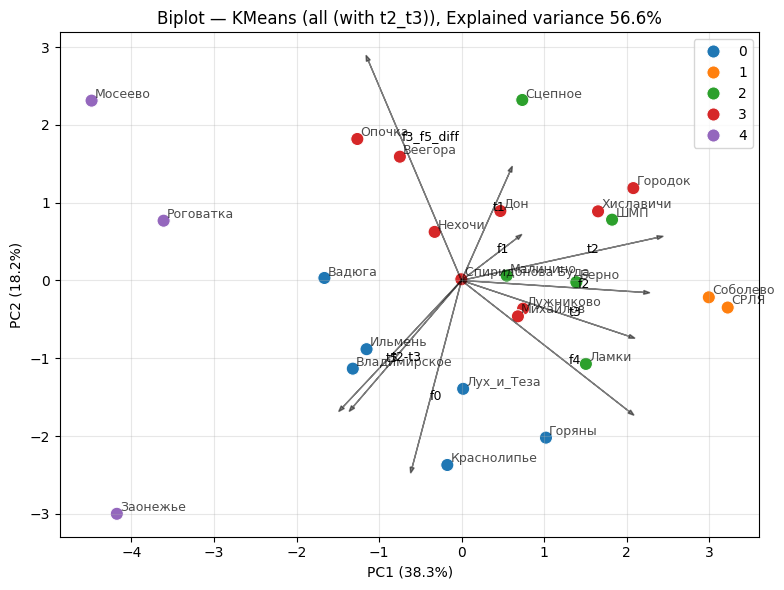

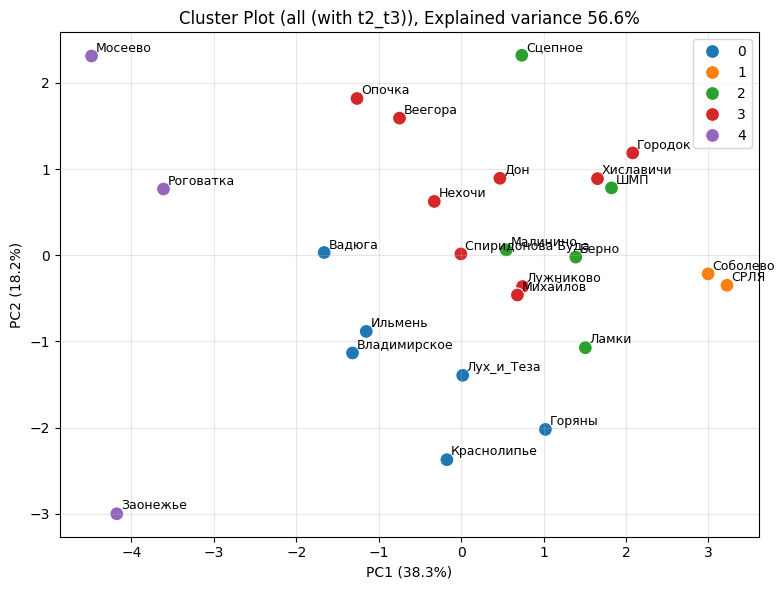

Режим: all (without t2_t3)
Selected 9 features: ['t1', 't2', 't3', 't5', 'f0', 'f1', 'f2', 'f4', 'f3_f5_diff']
Все признаки (all (without t2_t3)): ['t1', 't2', 't3', 't5', 'f0', 'f1', 'f2', 'f4', 'f3_f5_diff']
Оценка кластеров по различным метрикам:
   Method  Clusters  Silhouette     CH     DB
5  KMeans         9       0.214  8.004  0.759
4  KMeans         8       0.203  7.072  0.846
0  KMeans         4       0.176  5.635  1.145
2  KMeans         6       0.163  6.283  1.166
3  KMeans         7       0.162  6.783  1.047
1  KMeans         5       0.136  5.550  1.220
Лучший результат: KMeans (9 кластеров) | Sil=0.214, CH=8.0, DB=0.759
говоры по кластерам:
           Говор  Кластер
          Вадюга        0
       Лужниково        0
         Веегора        0
         Ильмень        0
      Лух_и_Теза        0
          Нехочи        0
    Владимирское        0
          Опочка        0
Спиридонова Буда        0
           Ламки        1
     Краснолипье        1
             Дон        2


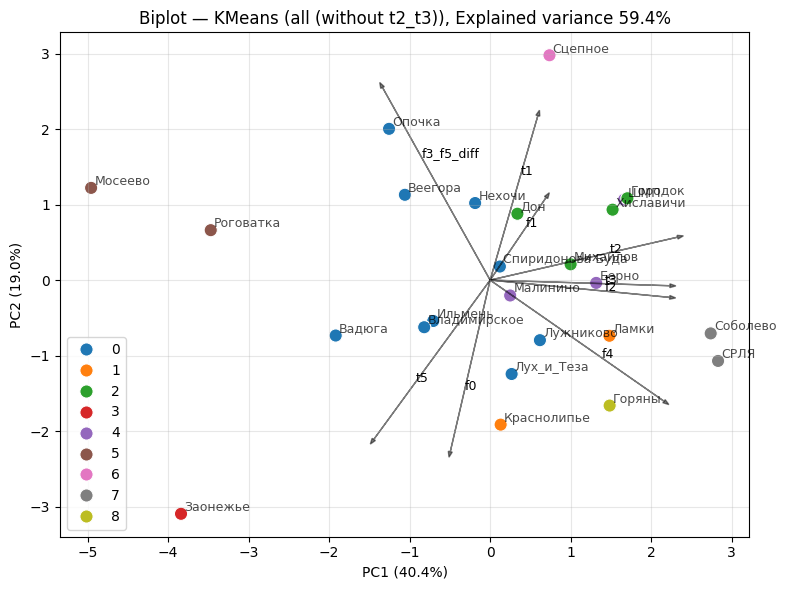

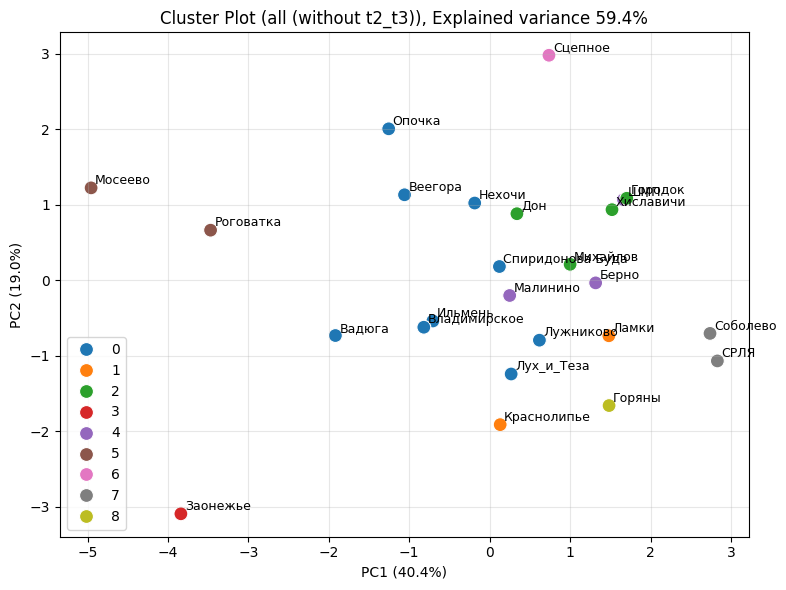

Режим: only t
Selected 4 features: ['t1', 't2', 't3', 't5']
Все признаки (only t): ['t1', 't2', 't3', 't5']
Оценка кластеров по различным метрикам:
   Method  Clusters  Silhouette      CH     DB
0  KMeans         4       0.359  17.253  0.932
1  KMeans         5       0.348  15.760  1.007
4  KMeans         8       0.318  16.567  0.654
3  KMeans         7       0.305  16.324  0.727
5  KMeans         9       0.303  16.493  0.613
2  KMeans         6       0.294  14.782  1.020
Лучший результат: KMeans (4 кластеров) | Sil=0.359, CH=17.3, DB=0.932
говоры по кластерам:
           Говор  Кластер
            СРЛЯ        0
       Лужниково        0
      Лух_и_Теза        0
         Ильмень        0
        Соболево        0
           Берно        0
    Владимирское        0
          Горяны        0
         Сцепное        1
          Нехочи        1
        Михайлов        1
         Веегора        1
          Опочка        1
         Городок        1
             ШМП        1
       Хиславичи

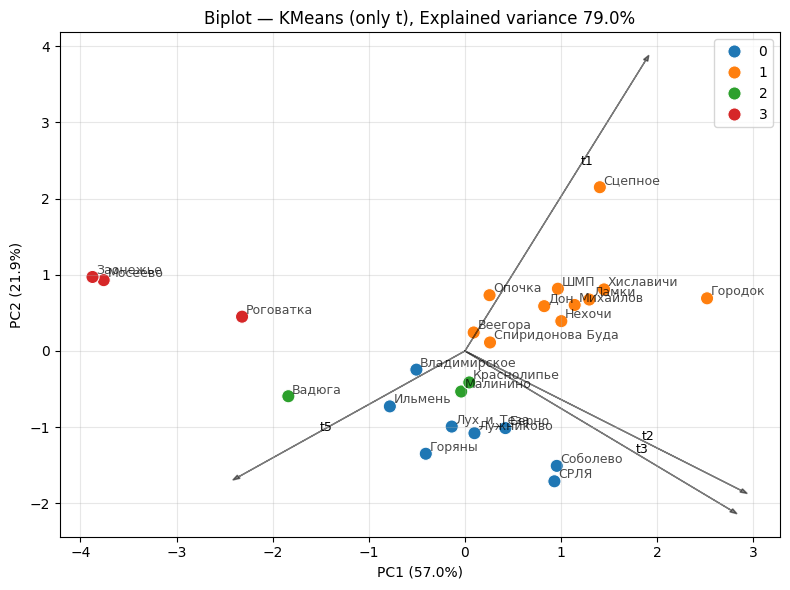

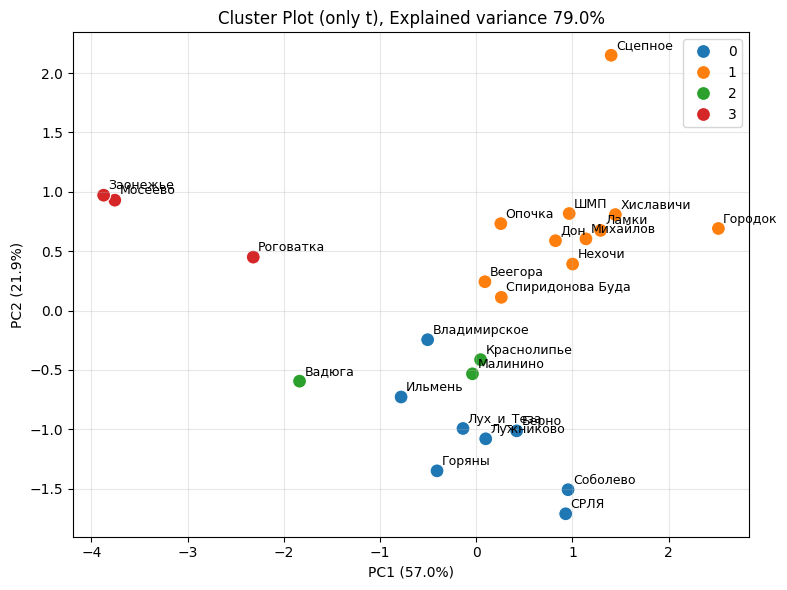

Режим: t + f3-f5 + t2-t3
Selected 6 features: ['t1', 't2', 't3', 't5', 't2-t3', 'f3_f5_diff']
Все признаки (t + f3-f5 + t2-t3): ['t1', 't2', 't3', 't5', 't2-t3', 'f3_f5_diff']
Оценка кластеров по различным метрикам:
   Method  Clusters  Silhouette     CH     DB
1  KMeans         5       0.242  9.057  0.940
0  KMeans         4       0.225  7.769  0.940
5  KMeans         9       0.220  9.112  0.773
4  KMeans         8       0.220  9.201  0.867
2  KMeans         6       0.204  8.367  1.071
3  KMeans         7       0.198  8.027  0.957
Лучший результат: KMeans (5 кластеров) | Sil=0.242, CH=9.1, DB=0.940
говоры по кластерам:
           Говор  Кластер
      Лух_и_Теза        0
         Ильмень        0
     Краснолипье        0
          Горяны        0
    Владимирское        0
         Веегора        1
       Хиславичи        1
        Михайлов        1
          Нехочи        1
Спиридонова Буда        1
          Опочка        1
           Ламки        1
             Дон        1
        

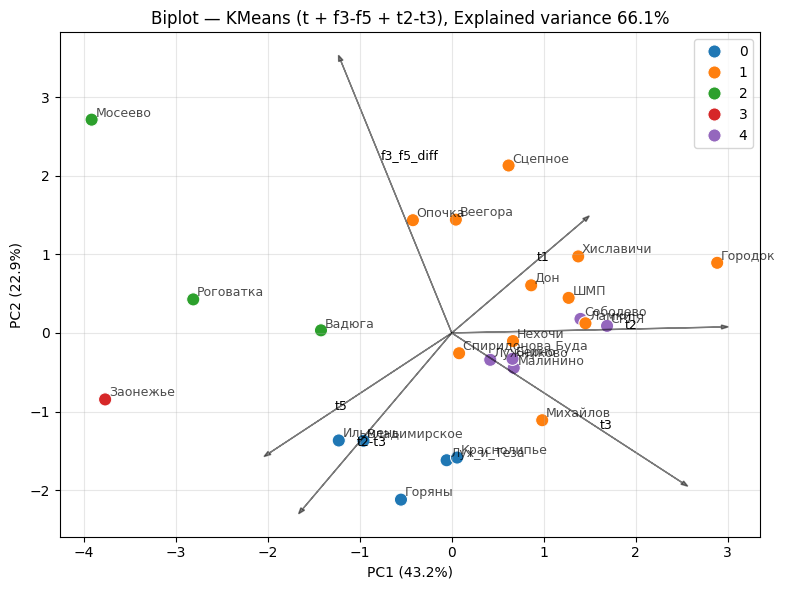

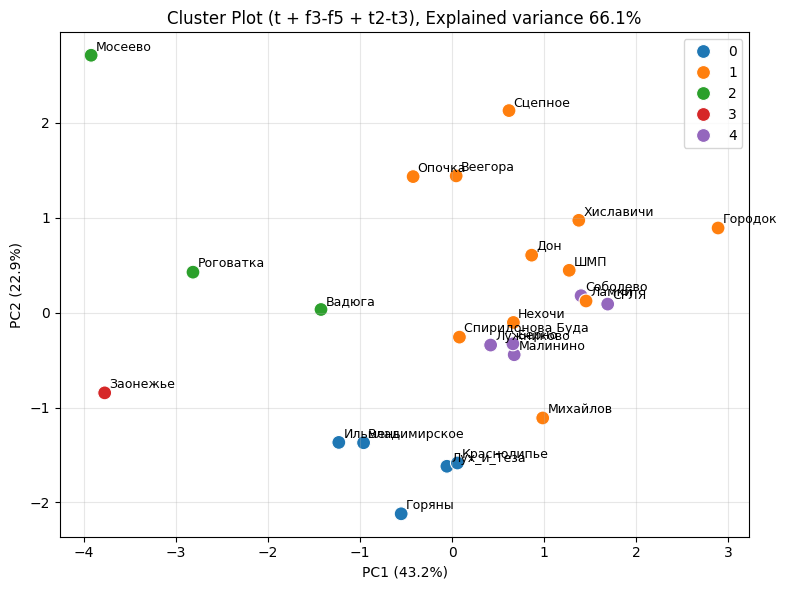

Режим: t + f3-f5 + f0 + t2-t3
Selected 7 features: ['t1', 't2', 't3', 't5', 't2-t3', 'f3_f5_diff', 'f0']
Все признаки (t + f3-f5 + f0 + t2-t3): ['t1', 't2', 't3', 't5', 't2-t3', 'f3_f5_diff', 'f0']
Оценка кластеров по различным метрикам:
   Method  Clusters  Silhouette     CH     DB
4  KMeans         8       0.242  8.803  0.671
5  KMeans         9       0.220  7.920  0.603
2  KMeans         6       0.160  5.056  1.138
1  KMeans         5       0.156  5.013  1.183
0  KMeans         4       0.144  5.858  1.180
3  KMeans         7       0.116  5.197  1.252
Лучший результат: KMeans (8 кластеров) | Sil=0.242, CH=8.8, DB=0.671
говоры по кластерам:
           Говор  Кластер
      Лух_и_Теза        0
         Ильмень        0
    Владимирское        0
          Горяны        0
         Веегора        1
         Сцепное        1
       Хиславичи        1
        Михайлов        1
          Нехочи        1
          Опочка        1
         Городок        1
Спиридонова Буда        1
            

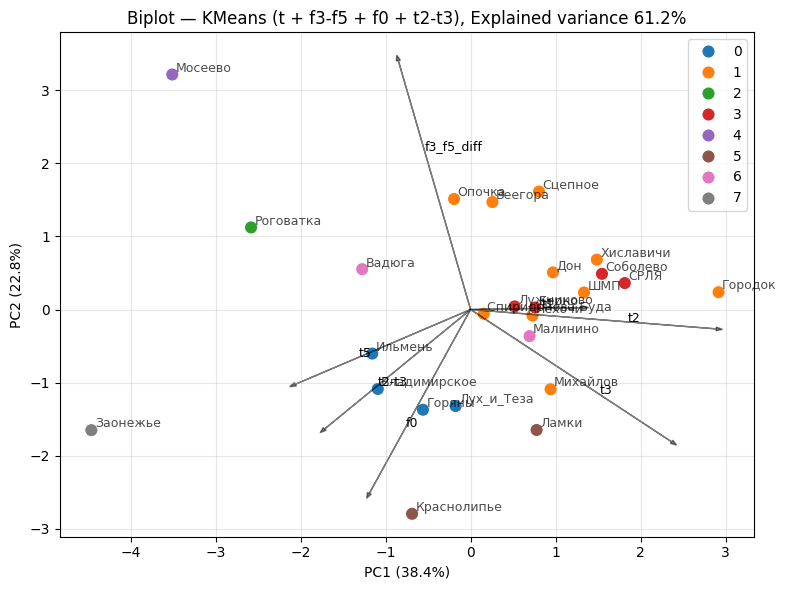

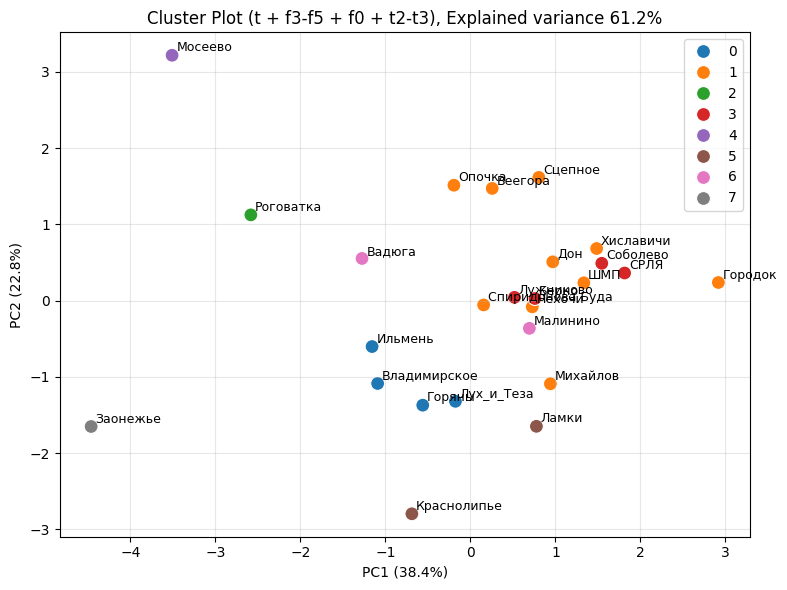

Режим: t + f3-f5
Selected 5 features: ['t1', 't2', 't3', 't5', 'f3_f5_diff']
Все признаки (t + f3-f5): ['t1', 't2', 't3', 't5', 'f3_f5_diff']
Оценка кластеров по различным метрикам:
   Method  Clusters  Silhouette      CH     DB
1  KMeans         5       0.307  12.122  0.943
3  KMeans         7       0.288  12.106  0.781
2  KMeans         6       0.283  11.551  0.866
5  KMeans         9       0.283  12.421  0.604
0  KMeans         4       0.280  11.983  0.986
4  KMeans         8       0.279  12.113  0.693
Лучший результат: KMeans (5 кластеров) | Sil=0.307, CH=12.1, DB=0.943
говоры по кластерам:
           Говор  Кластер
          Вадюга        0
      Лух_и_Теза        0
         Ильмень        0
        Малинино        0
     Краснолипье        0
    Владимирское        0
          Горяны        0
        Михайлов        1
          Нехочи        1
       Хиславичи        1
           Ламки        1
Спиридонова Буда        1
             Дон        1
             ШМП        1
        

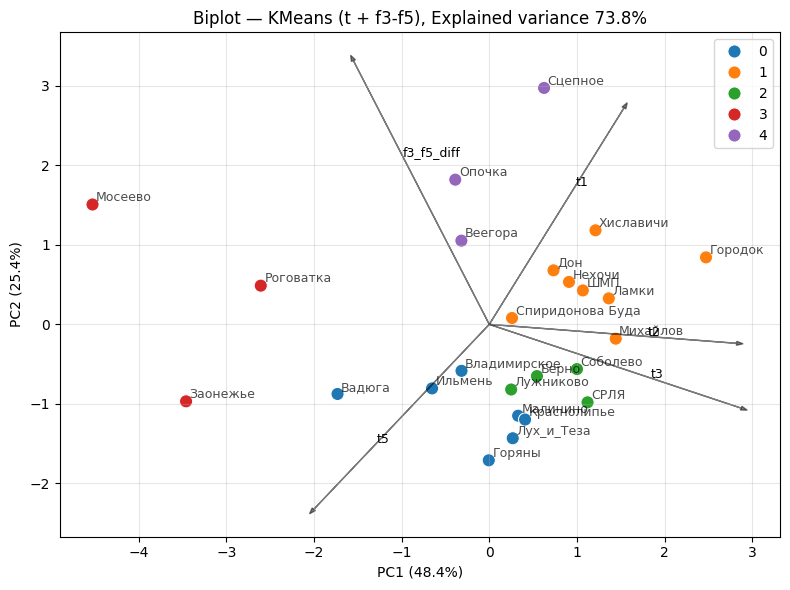

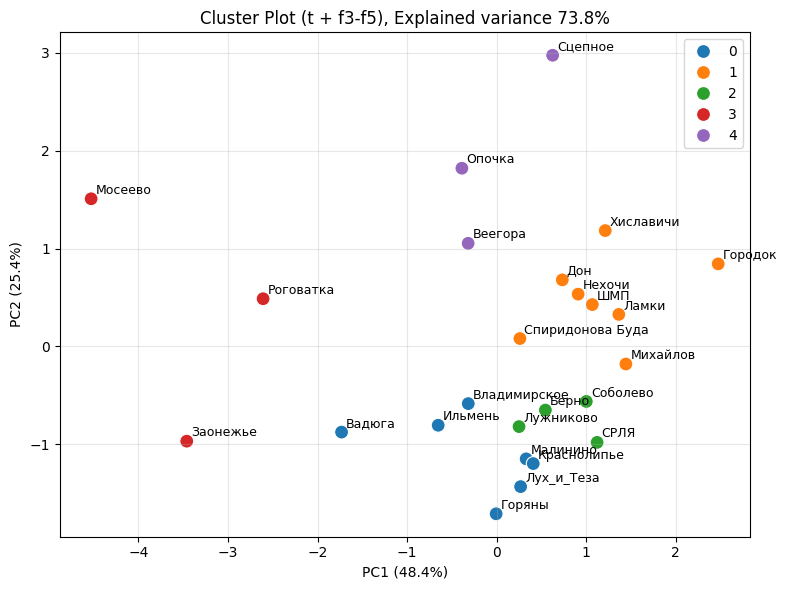

Режим: t + f3-f5 + f0
Selected 6 features: ['t1', 't2', 't3', 't5', 'f3_f5_diff', 'f0']
Все признаки (t + f3-f5 + f0): ['t1', 't2', 't3', 't5', 'f3_f5_diff', 'f0']
Оценка кластеров по различным метрикам:
   Method  Clusters  Silhouette      CH     DB
1  KMeans         5       0.288  11.275  0.814
2  KMeans         6       0.282  11.657  0.778
0  KMeans         4       0.278  10.227  1.018
3  KMeans         7       0.240  10.455  0.664
5  KMeans         9       0.199   8.913  0.569
4  KMeans         8       0.196   9.255  0.625
Лучший результат: KMeans (5 кластеров) | Sil=0.288, CH=11.3, DB=0.814
говоры по кластерам:
           Говор  Кластер
            СРЛЯ        0
          Вадюга        0
       Лужниково        0
        Малинино        0
      Лух_и_Теза        0
        Соболево        0
         Ильмень        0
          Горяны        0
    Владимирское        0
           Берно        0
         Сцепное        1
         Городок        1
          Нехочи        1
        Миха

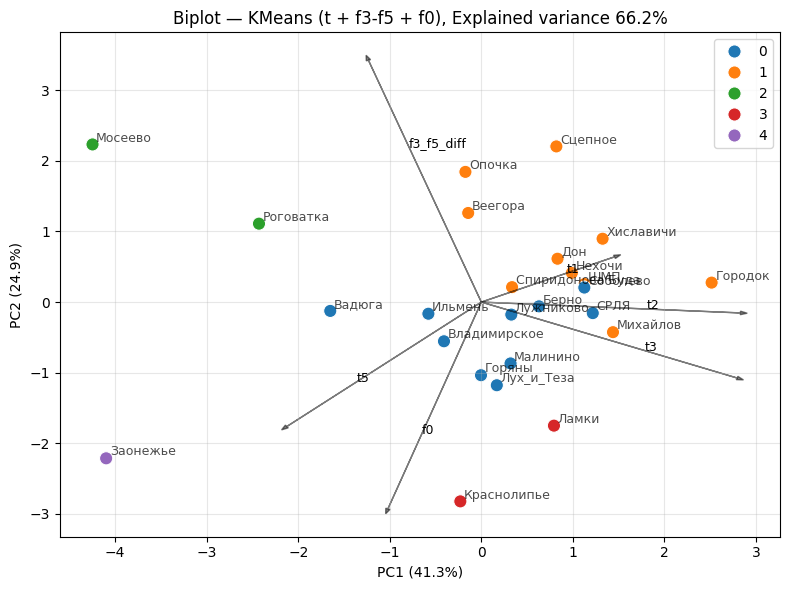

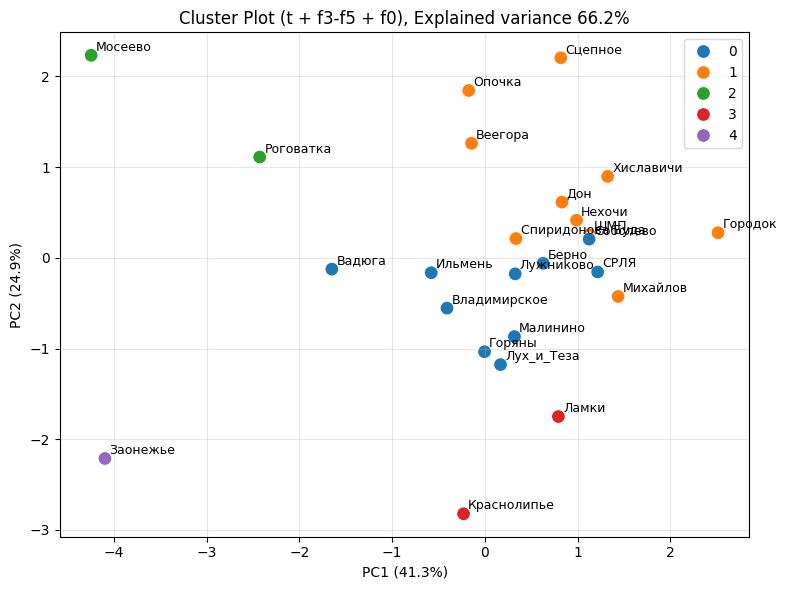

Режим: t1, t2, t3
Selected 3 features: ['t1', 't2', 't3']
Все признаки (t1, t2, t3): ['t1', 't2', 't3']
Оценка кластеров по различным метрикам:
   Method  Clusters  Silhouette      CH     DB
0  KMeans         4       0.404  21.628  0.773
1  KMeans         5       0.398  22.312  0.664
5  KMeans         9       0.336  28.397  0.522
2  KMeans         6       0.329  25.103  0.817
4  KMeans         8       0.321  23.861  0.595
3  KMeans         7       0.294  22.181  0.757
Лучший результат: KMeans (4 кластеров) | Sil=0.404, CH=21.6, DB=0.773
говоры по кластерам:
           Говор  Кластер
            СРЛЯ        0
       Лужниково        0
      Лух_и_Теза        0
         Ильмень        0
        Соболево        0
           Берно        0
    Владимирское        0
          Горяны        0
         Сцепное        1
         Веегора        1
        Михайлов        1
        Малинино        1
          Нехочи        1
         Городок        1
             ШМП        1
       Хиславичи    

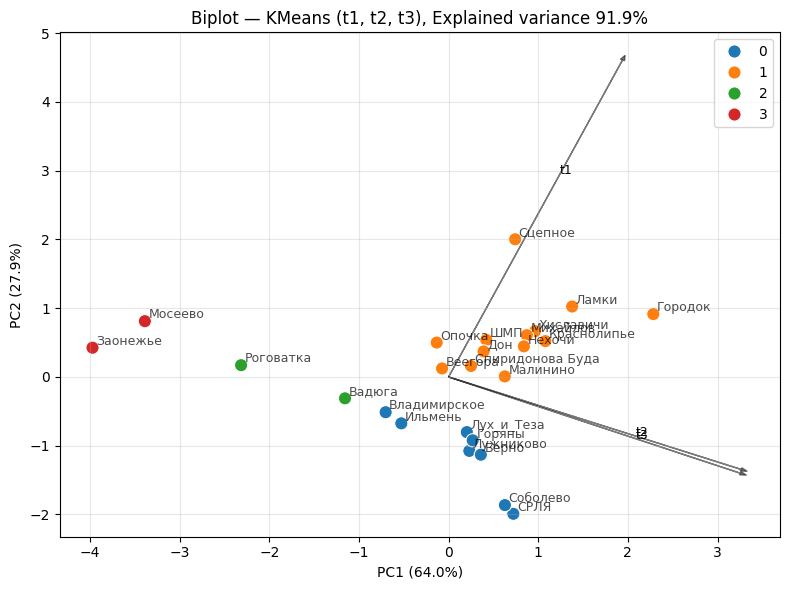

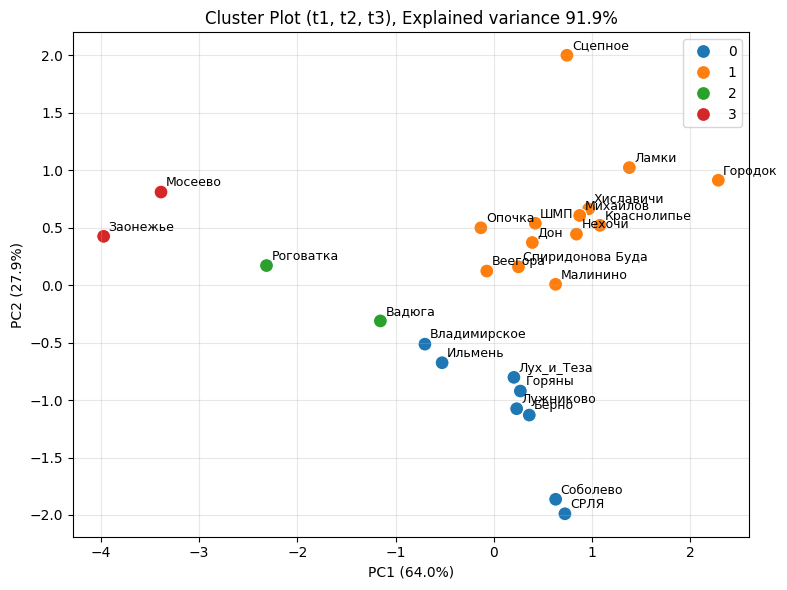

In [70]:
if __name__ == "__main__":

    modes = [
        'all (with t2_t3)',
        'all (without t2_t3)',
        'only t',
        't + f3-f5 + t2-t3',
        't + f3-f5 + f0 + t2-t3',
        't + f3-f5',
        't + f3-f5 + f0',
        't1, t2, t3'
    ]

    for mode in modes:
        print(f"Режим: {mode}")
        results, best, X = cluster_analysis(df_govors, mode=mode, k_range=range(4, 10))